In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr

# ---------- TÓPICO 1: Amostragem Estratificada ----------
# Gerando os dados base
np.random.seed(42)  # Garante que o resultado não muda a cada execução

dados = pd.DataFrame({
    'Aluno': [f'Aluno_{i+1}' for i in range(20)],
    'Genero': np.random.choice(['M', 'F'], size=20),
    'Nível_Escolaridade': np.random.choice(['Fundamental', 'Médio', 'Superior'], size=20),
    'Nota_Matematica': np.random.randint(0, 11, size=20),  # Notas inteiras de 0 a 10
    'Evasao': np.random.choice([0, 1], size=20)
})

# Aplicando amostragem estratificada por Gênero
amostra_estratificada = dados.groupby('Genero', group_keys=False).apply(
    lambda grupo: grupo.sample(frac=0.5, random_state=42)
).reset_index(drop=True)

# Exibindo a tabela da amostra estratificada
print(amostra_estratificada)

      Aluno Genero Nível_Escolaridade  Nota_Matematica  Evasao
0   Aluno_2      F        Fundamental                6       1
1   Aluno_6      F              Médio                4       1
2  Aluno_18      F           Superior                9       1
3  Aluno_10      F              Médio                8       0
4  Aluno_16      M           Superior                9       1
5  Aluno_13      M        Fundamental                3       1
6   Aluno_1      M              Médio                2       1
7  Aluno_12      M        Fundamental                1       0
8   Aluno_8      M        Fundamental                6       1
9   Aluno_4      M              Médio                8       1


<ipython-input-1-3160413584>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra_estratificada = dados.groupby('Genero', group_keys=False).apply(


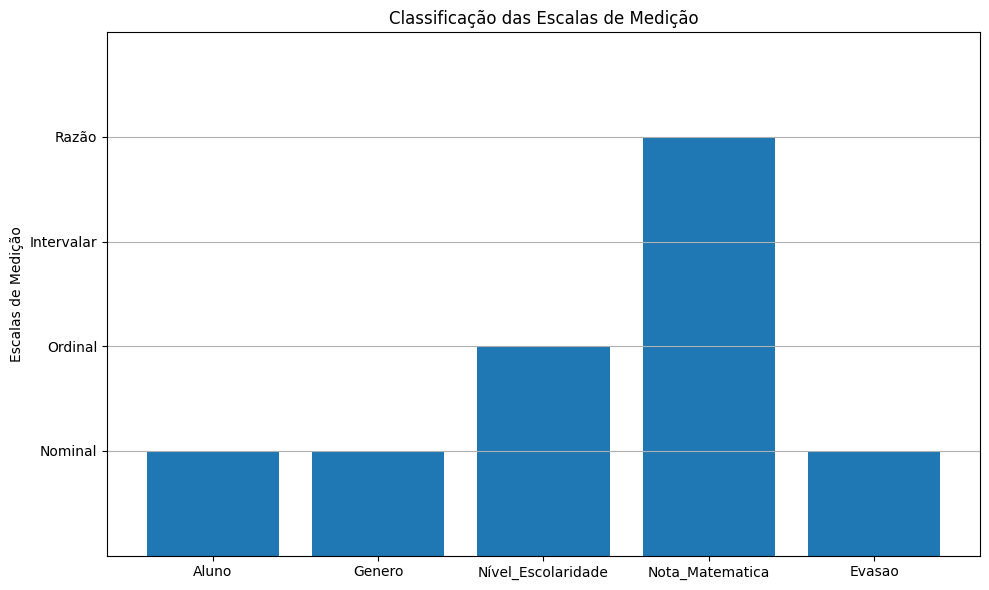

In [ ]:
# ---------- TÓPICO 2: Escalas De Medição ----------
# Definir as escalas de medição das colunas analisadas
escalas = {
    'Aluno': 'Nominal',
    'Genero': 'Nominal',
    'Nível_Escolaridade': 'Ordinal',
    'Nota_Matematica': 'Razão',
    'Evasao': 'Nominal'
}

# Mapa para converter escalas em valores numéricos (para plotar no gráfico)
mapa_escala = {
    'Nominal': 1,
    'Ordinal': 2,
    'Intervalar': 3,
    'Razão': 4
}

# Preparar dados para gráfico
colunas = list(escalas.keys())
tipos = list(escalas.values())
valores = [mapa_escala[tipo] for tipo in tipos]

# Plotar gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(colunas, valores)
plt.ylim(0, 5)
plt.ylabel('Escalas de Medição')
plt.title('Classificação das Escalas de Medição')
plt.yticks([1, 2, 3, 4], ['Nominal', 'Ordinal', 'Intervalar', 'Razão'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


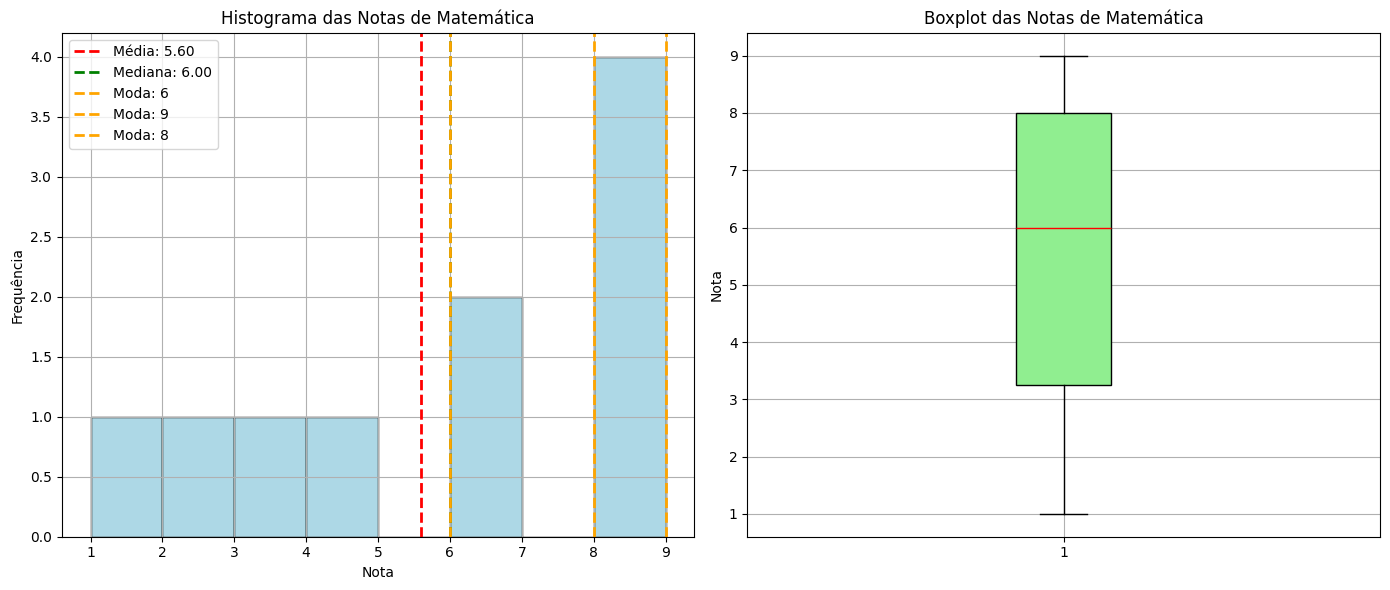

In [ ]:
# ---------- TÓPICO 3: Medidas de Tendência Central ----------

# Calculando as medidas de tendência central
media = amostra_estratificada['Nota_Matematica'].mean()
mediana = amostra_estratificada['Nota_Matematica'].median()
frequencias = amostra_estratificada['Nota_Matematica'].value_counts()
moda = frequencias[frequencias == frequencias.max()]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------- Histograma ----------
axes[0].hist(amostra_estratificada['Nota_Matematica'], bins=8, color='lightblue', edgecolor='black')
axes[0].axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
axes[0].axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
for m in moda.index:
    axes[0].axvline(m, color='orange', linestyle='dashed', linewidth=2, label=f'Moda: {m}')

axes[0].set_title('Histograma das Notas de Matemática')
axes[0].set_xlabel('Nota')
axes[0].set_ylabel('Frequência')
axes[0].legend()
axes[0].grid(True)

# ---------- Boxplot ----------
axes[1].boxplot(amostra_estratificada['Nota_Matematica'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'))
axes[1].set_title('Boxplot das Notas de Matemática')
axes[1].set_ylabel('Nota')
axes[1].grid(True)

# Ajustando layout
plt.tight_layout()
plt.show()


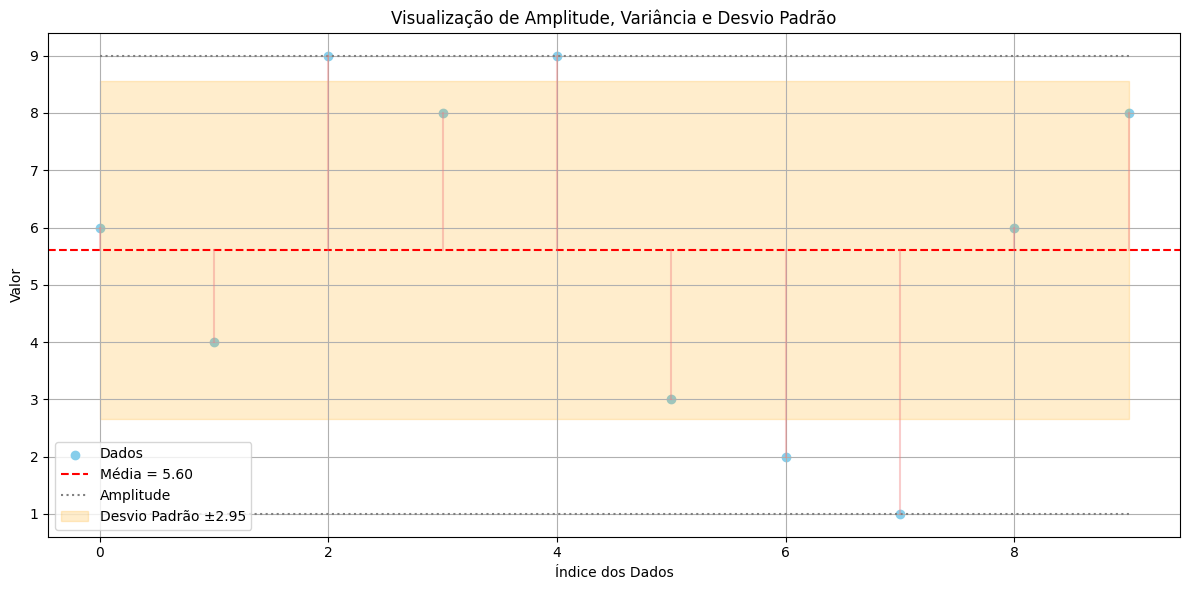

In [ ]:
# ---------- TÓPICO 4: Medidas de Dispersão ----------

# Pegando só as notas da amostra
dados = amostra_estratificada['Nota_Matematica']

# Cálculos básicos
media = dados.mean()
desvio = dados.std()
variancia = dados.var()
minimo = dados.min()
maximo = dados.max()
amplitude = maximo - minimo

# Plot
plt.figure(figsize=(12, 6))

# Espalhamento dos dados
plt.scatter(range(len(dados)), dados, color='skyblue', label='Dados')

# Média
plt.axhline(media, color='red', linestyle='--', label=f'Média = {media:.2f}')

# Amplitude
plt.hlines(y=[minimo, maximo], xmin=0, xmax=len(dados)-1, colors='gray', linestyles='dotted', label='Amplitude')

# Faixa do desvio padrão (área sombreada)
plt.fill_between(range(len(dados)), media - desvio, media + desvio,
                 color='orange', alpha=0.2, label=f'Desvio Padrão ±{desvio:.2f}')

# Linhas da variância (de cada ponto até a média)
for i, y in enumerate(dados):
    plt.plot([i, i], [media, y], color='lightcoral', alpha=0.4)

# Rótulos
plt.title("Visualização de Amplitude, Variância e Desvio Padrão")
plt.xlabel("Índice dos Dados")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


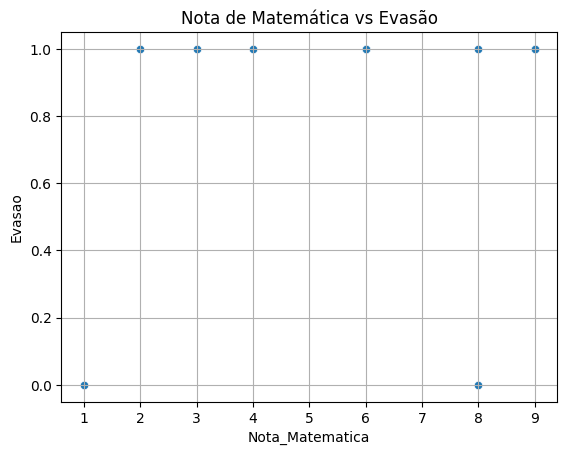

Coeficiente de correlação de Pearson: r = 0.20
Valor-p: 0.5865


In [ ]:
# ---------- TÓPICO 5: Correlação entre variáveis ----------

# Scatterplot: Nota de Matemática vs Evasão
sns.scatterplot(data=amostra_estratificada, x='Nota_Matematica', y='Evasao')
plt.title('Nota de Matemática vs Evasão')
plt.grid(True)
plt.show()

# Calcular correlação de Pearson
r, p = pearsonr(amostra_estratificada['Nota_Matematica'], amostra_estratificada['Evasao'])

# Exibir resultado
print(f'Coeficiente de correlação de Pearson: r = {r:.2f}')
print(f'Valor-p: {p:.4f}')